# Rabljeni motocikli

V nadaljevanju bom analizirala motocikle, ki se prodajajo na http://www.mobile.de. Izbrala sem le oglase rabljenih, nepoškodovanih motociklov, mlajših od 10 let, ter s prostornino večjo od 500ccm. Da bi se izognila ekstremnim in neresničnim vrednostim, sem omejila še število prevoženih km (1.000 < x < 150.000), prostornino (500 ccm < x < 2.000 ccm), moč (10 kW < x < 200 kW) in ceno (500 € < x < 30.000 €).

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
tabela = pd.read_csv('motocikli.csv', index_col = 'id', encoding = 'latin1')
pd.options.display.max_rows = 8

### Razlaga zajetih podatkov

- letnik: leto prve registracije motocikla, za katero bom privzela, da se ujema z letom izdelave
- znamka: ime izdelovalca motocikla
- tip: motocikli so na grobo razdeljeni v skupine glede na obliko in namen
- prostornina: delovna prostornina pogonskega agregata
- moc: moč pogonskega agregata izražena v kW
- km: število prevoženih kilometrov
- cena: cena motocikla, določena s strani prodajalca v evrih

In [26]:
motocikli = tabela.dropna(how='any')
motocikli

,letnik,znamka,tip,prostornina,moc,km,cena
id,,,,,,,
237662642,2006,Hyosung,Chopper And Cruiser,650,52,16000,2999
237662642,2006,Hyosung,Chopper And Cruiser,647,59,3945,2999
229082730,2006,Yamaha,Chopper And Cruiser,1100,48,54000,3800
231224244,2006,Harley-Davidson,Chopper And Cruiser,1800,85,4500,24500
...,...,...,...,...,...,...,...
235820343,2016,Harley-Davidson,Tourer,1690,64,9500,27990
233522567,2016,Harley-Davidson,Tourer,1810,68,1090,28900
233522567,2016,Harley-Davidson,Tourer,1690,64,6125,29045
235890185,2016,Harley-Davidson,Tourer,1800,72,10798,29990


Poglejmo najprej nekaj povprečnih rezultatov vseh oglasov.

In [22]:
motocikli['znamka'].value_counts()

BMW                2849
Harley-Davidson    2093
Honda              1676
Kawasaki           1616
                   ... 
Thunderbike           1
Norton                1
Bimota                1
Horex                 1
Name: znamka, dtype: int64

In [5]:
motocikli['letnik'].mean()

2011.3356736877299

In [6]:
motocikli['km'].mean()

16598.127983951854

In [7]:
motocikli['cena'].mean()

9586.1348712805084

In [23]:
motocikli['tip'].value_counts()

Naked Bike                      4067
Chopper And Cruiser             2853
Sports And Super Sports Bike    2607
Enduro And Touring Enduro       2486
Sport Touring Motorcycle        1515
Tourer                           984
Super Moto                       443
Name: tip, dtype: int64

In [9]:
motocikli['moc'].mean()

80.438381812102975

In [10]:
motocikli['prostornina'].mean()

1033.7905048478769

Ker nam povprečne vrednosti povedo le zanimive in ne koristnih podatkov, si podatke poglejmo bolj podrobno.

Recimo, da kupujemo motocikel in bi radi svoj denar čim bolje izkoristili. Poglejmo si kako cena narašča oziroma pada glede na izbrane parametre.

Kateri tip motocikla je najcenejši?

In [27]:
m = motocikli
m['prostornina'] = m['prostornina'].apply(lambda x: round((x /100), 0) * 100)
m['moc'] = m['moc'].apply(lambda x: round((x /10), 0) * 10)
m['km'] = m['km'].apply(lambda x: round((x /5000), 0) * 5000)

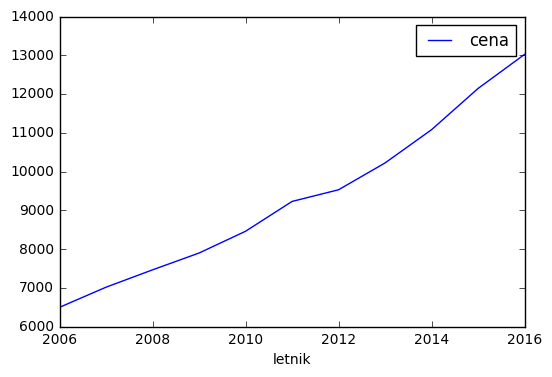

In [28]:
letnik = m.groupby('letnik').mean()
pd.DataFrame(letnik['cena']).plot(kind='line')

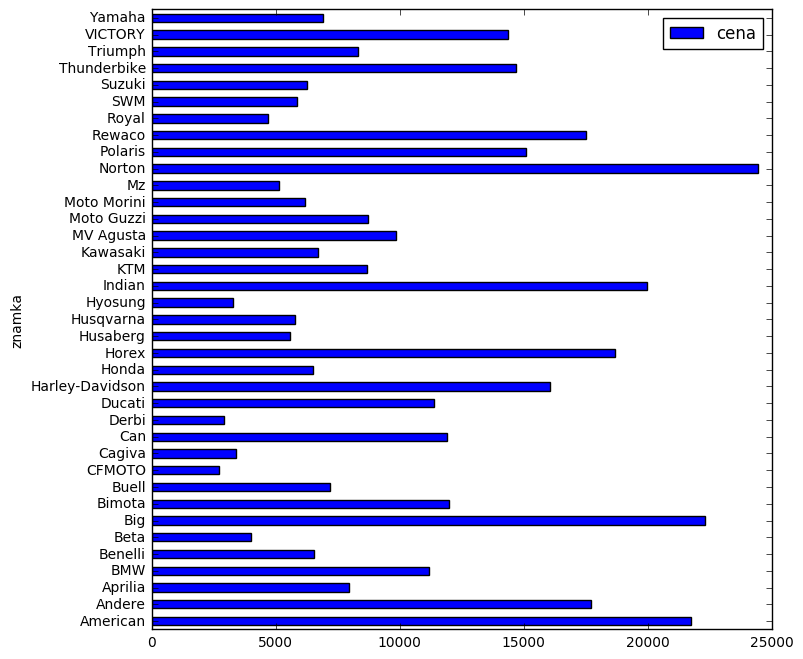

In [21]:
znamka = motocikli.groupby('znamka').mean()
pd.DataFrame(znamka['cena']).plot(kind='barh', figsize=(8,8))

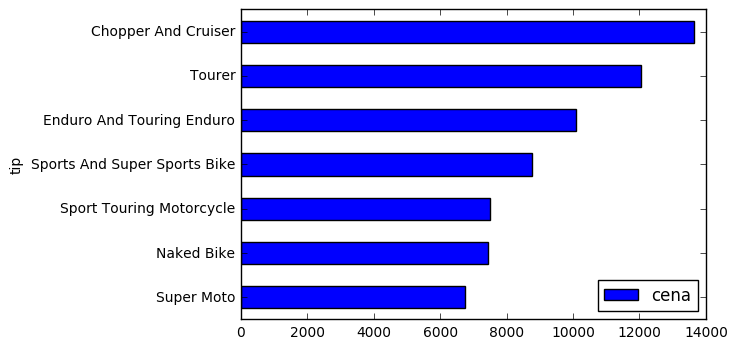

In [24]:
tip = motocikli.groupby('tip').mean()
pd.DataFrame(tip['cena']).sort_values(['cena']).plot(kind='barh')

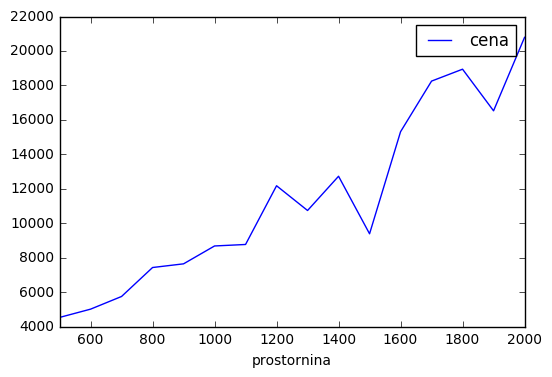

In [29]:
prostornina = m.groupby('prostornina').mean()
pd.DataFrame(prostornina['cena']).plot(kind='line')

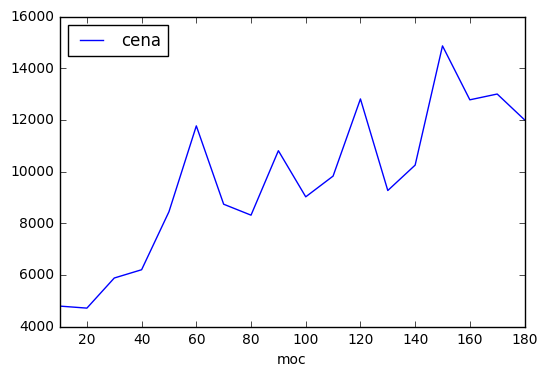

In [14]:
moc = m.groupby('moc').mean()
pd.DataFrame(moc['cena']).plot(kind='line')

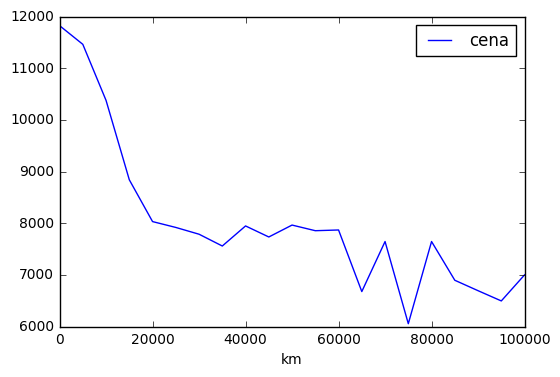

In [15]:
km = m.groupby('km').mean()
pd.DataFrame(km['cena']).plot(kind='line')

In [67]:
n_tipi = tipi.nlargest(3)
n_tipi

Naked Bike                      4608
Chopper And Cruiser             3093
Sports And Super Sports Bike    3059
Name: tip, dtype: int64